# 2. Thu nhập dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import ssl
context = ssl._create_unverified_context()

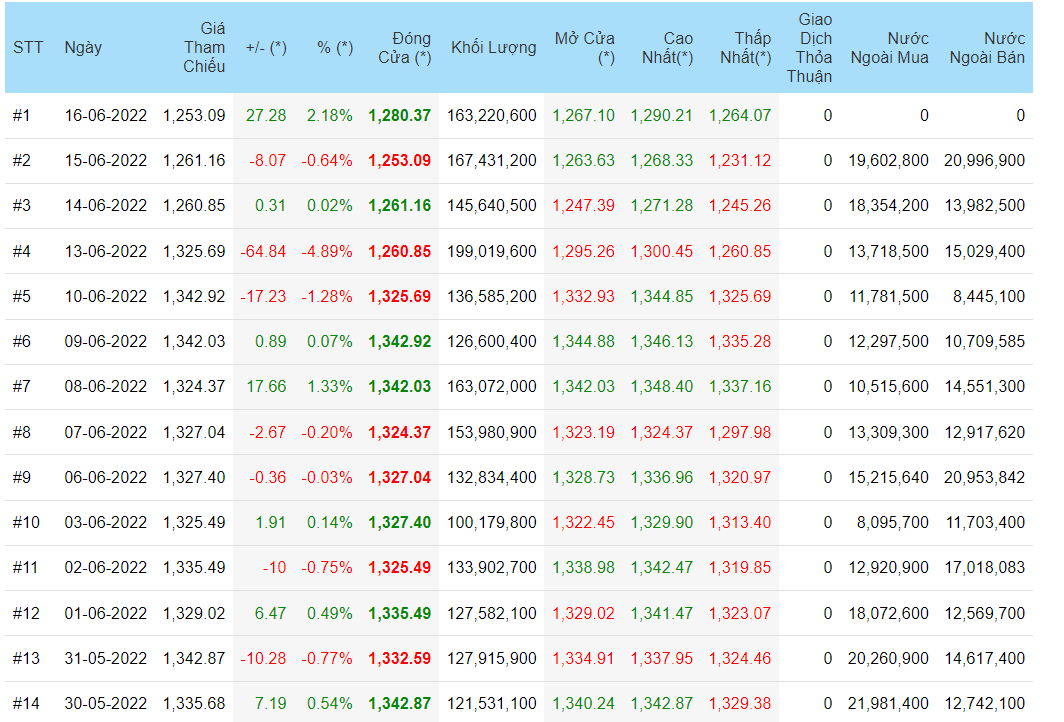

In [ ]:
arr_row_list = []
arr_row_list = np.reshape(arr_row_list, (0, 13))
for pages in range(1,25):
    url = 'https://www.cophieu68.vn/historyprice.php?currentPage='+str(pages)+'&id=^vn30'
    page = urllib.request.urlopen(url,context=context)
    soup = BeautifulSoup(page, 'html.parser')

    # read all data of table stock
    data = soup.findAll(class_='stock')
    
    # read the columns header of table
    header = soup.findAll(class_='tr_header')

    # create header of DataFrame
    columns = []
    for td in header[0].find_all("td"):
        # remove any newlines and extra spaces from left and right
        columns.append(td.get_text().replace('\n', ' ').strip())
        
    # create row of DataFrame
    row = []
    for tr in data[0].find_all("tr"):
        for td in tr.find_all("td"):
            row.append(td.get_text().replace('\n', ' ').strip())
    arr_row = np.array(row)
    arr_row = np.reshape(arr_row, (101, 13))
    arr_row = np.delete(arr_row, (0), axis=0)
    arr_row_list = np.append(arr_row_list, arr_row, axis=0)


In [ ]:
df = pd.DataFrame(arr_row_list,columns=columns)
df

,STT,Ngày,Giá Tham Chiếu,+/- (*),% (*),Đóng Cửa (*),Khối Lượng,Mở Cửa (*),Cao Nhất(*),Thấp Nhất(*),Giao Dịch Thỏa Thuận,Nước Ngoài Mua,Nước Ngoài Bán
0,#1,16-06-2022,"1,253.09",27.28,2.18%,"1,280.37","163,220,600","1,267.10","1,290.21","1,264.07",0,0,0
1,#2,15-06-2022,"1,261.16",-8.07,-0.64%,"1,253.09","167,431,200","1,263.63","1,268.33","1,231.12",0,"19,602,800","20,996,900"
2,#3,14-06-2022,"1,260.85",0.31,0.02%,"1,261.16","145,640,500","1,247.39","1,271.28","1,245.26",0,"18,354,200","13,982,500"
3,#4,13-06-2022,"1,325.69",-64.84,-4.89%,"1,260.85","199,019,600","1,295.26","1,300.45","1,260.85",0,"13,718,500","15,029,400"
4,#5,10-06-2022,"1,342.92",-17.23,-1.28%,"1,325.69","136,585,200","1,332.93","1,344.85","1,325.69",0,"11,781,500","8,445,100"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,#2396,06-11-2012,446.50,0.10,0%,446.63,"33,152,701",446.05,449.31,443.86,0,0,0
2396,#2397,05-11-2012,441.90,4.60,1%,446.51,"12,484,210",437.29,446.51,437.16,0,0,0
2397,#2398,02-11-2012,458.10,-16.20,-3.50%,441.90,"23,995,640",452.83,452.83,441.42,0,0,0
2398,#2399,01-11-2012,458.60,-0.50,-0.10%,458.06,"33,147,894",458.30,460.76,458.06,0,0,0


In [ ]:
df.columns

Index(['STT', 'Ngày', 'Giá Tham Chiếu', '+/- (*)', '% (*)', 'Đóng Cửa (*)',
       'Khối Lượng', 'Mở Cửa (*)', 'Cao Nhất(*)', 'Thấp Nhất(*)',
       'Giao Dịch Thỏa Thuận', 'Nước Ngoài Mua', 'Nước Ngoài Bán'],
      dtype='object')

In [ ]:
df = df.drop(["STT", "Giá Tham Chiếu", "+/- (*)","Giao Dịch Thỏa Thuận",'Nước Ngoài Mua', 'Nước Ngoài Bán'], axis=1)
df

,Ngày,% (*),Đóng Cửa (*),Khối Lượng,Mở Cửa (*),Cao Nhất(*),Thấp Nhất(*)
0,16-06-2022,2.18%,"1,280.37","163,220,600","1,267.10","1,290.21","1,264.07"
1,15-06-2022,-0.64%,"1,253.09","167,431,200","1,263.63","1,268.33","1,231.12"
2,14-06-2022,0.02%,"1,261.16","145,640,500","1,247.39","1,271.28","1,245.26"
3,13-06-2022,-4.89%,"1,260.85","199,019,600","1,295.26","1,300.45","1,260.85"
4,10-06-2022,-1.28%,"1,325.69","136,585,200","1,332.93","1,344.85","1,325.69"
...,...,...,...,...,...,...,...
2395,06-11-2012,0%,446.63,"33,152,701",446.05,449.31,443.86
2396,05-11-2012,1%,446.51,"12,484,210",437.29,446.51,437.16
2397,02-11-2012,-3.50%,441.90,"23,995,640",452.83,452.83,441.42
2398,01-11-2012,-0.10%,458.06,"33,147,894",458.30,460.76,458.06


In [ ]:
df.rename(
    columns={
        "Ngày": "Date",
        "% (*)": "Change %",
        "Đóng Cửa (*)": "Close",
        "Khối Lượng": "Volume",
        "Mở Cửa (*)": "Open",
        "Cao Nhất(*)": "High",
        "Thấp Nhất(*)": "Low"

    },
    inplace=True
)
df

,Date,Change %,Close,Volume,Open,High,Low
0,16-06-2022,2.18%,"1,280.37","163,220,600","1,267.10","1,290.21","1,264.07"
1,15-06-2022,-0.64%,"1,253.09","167,431,200","1,263.63","1,268.33","1,231.12"
2,14-06-2022,0.02%,"1,261.16","145,640,500","1,247.39","1,271.28","1,245.26"
3,13-06-2022,-4.89%,"1,260.85","199,019,600","1,295.26","1,300.45","1,260.85"
4,10-06-2022,-1.28%,"1,325.69","136,585,200","1,332.93","1,344.85","1,325.69"
...,...,...,...,...,...,...,...
2395,06-11-2012,0%,446.63,"33,152,701",446.05,449.31,443.86
2396,05-11-2012,1%,446.51,"12,484,210",437.29,446.51,437.16
2397,02-11-2012,-3.50%,441.90,"23,995,640",452.83,452.83,441.42
2398,01-11-2012,-0.10%,458.06,"33,147,894",458.30,460.76,458.06


In [ ]:
df.to_csv('HistoricalVN30Data.csv')